### **BPIC 2012 - No milestone**


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data.processor import *
from data.args import *

from tensorflow.keras.utils import to_categorical


### Define the experiment parameters

In [2]:
milestone = 'All' #'A_PREACCEPTED' # 'W_Nabellen offertes', 'All'
experiment =  'OHE'#'Standard'#'OHE', 'No_loops'
n_size = 5
max_size = 1000 #  3, 5, 10, 15, 20, 30, 50, 95
min_size = 0  # 0, 3, 5, 10, 15, 20, 30, 50

### Setting up the key parameters


In [3]:
# # For local environment only

MY_WORKSPACE_DIR = os.path.join(os.getcwd(),'BPIC12')
MILESTONE_DIR = os.path.join(os.path.join(MY_WORKSPACE_DIR, milestone),experiment)

In [4]:
args = get_parameters('bpic12', MILESTONE_DIR, MY_WORKSPACE_DIR, milestone, experiment,n_size)
args

{'folder': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC12\\All\\OHE\\output_files',
 'lstm_act': None,
 'dense_act': None,
 'optim': 'Adam',
 'norm_method': 'lognorm',
 'model_type': 'shared_cat',
 'l_size': 50,
 'n_size': 5,
 'file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC12\\BPIC_2012_Prefixes.csv',
 'file_name_all': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC12\\BPIC_2012_Prefixes_all.csv',
 'processed_file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC12\\All\\OHE\\BPIC_2

In [5]:
#This code will be specific for all next activity prediction only, since we save the models and vectors by prefix length groups
if milestone == 'All':
  args['indexes'] = MILESTONE_DIR+'indexes_'+str(max_size)+'.p'
  args['pre_index'] = MILESTONE_DIR+'pre_index_'+str(max_size)+'.p'
  args['processed_test_vec'] = MILESTONE_DIR+'vec_test_'+str(max_size)+'.p'
  args['processed_training_vec'] = MILESTONE_DIR+'vec_training_'+str(max_size)+'.p'
  args['weights'] = MILESTONE_DIR+'weights_'+str(max_size)+'.p'

args

{'folder': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC12\\All\\OHE\\output_files',
 'lstm_act': None,
 'dense_act': None,
 'optim': 'Adam',
 'norm_method': 'lognorm',
 'model_type': 'shared_cat',
 'l_size': 50,
 'n_size': 5,
 'file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC12\\BPIC_2012_Prefixes.csv',
 'file_name_all': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC12\\BPIC_2012_Prefixes_all.csv',
 'processed_file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC12\\All\\OHE\\BPIC_2

###Data Preprocessing

In [6]:
if milestone == 'All':
  log_df = pd.read_csv(args['file_name_all'])
  log_df = log_df.reset_index(drop=True)
else:
  log_df = pd.read_csv(args['file_name'])
  log_df = log_df.reset_index(drop=True)

log_df.head()

,prefix_id,caseid,task,role,end_timestamp,trace_start,timelapsed,next_activity,milestone,milestone_id,task_index,prefix_length,timelapsed_2
0,197162_39,197162,W_Nabellen offertes,role_ 11119,2012-02-16 05:37:33.0800000 +10:00,2012-01-02 23:19:35.6630000 +10:00,1062,A_CANCELLED,W_Nabellen offertes,39,36,39,26
1,197162_39,197162,A_SUBMITTED,role_ 112,2012-01-02 23:19:35.6630000 +10:00,2012-01-02 23:19:35.6630000 +10:00,0,A_CANCELLED,W_Nabellen offertes,39,1,39,0
2,197162_39,197162,W_Completeren aanvraag,role_ 11181,2012-01-05 19:29:57.4260000 +10:00,2012-01-02 23:19:35.6630000 +10:00,68,A_CANCELLED,W_Nabellen offertes,39,11,39,16
3,197162_39,197162,W_Completeren aanvraag,role_ 10861,2012-01-05 03:17:47.3530000 +10:00,2012-01-02 23:19:35.6630000 +10:00,52,A_CANCELLED,W_Nabellen offertes,39,10,39,3
4,197162_39,197162,W_Completeren aanvraag,role_ 10929,2012-01-05 00:06:07.0500000 +10:00,2012-01-02 23:19:35.6630000 +10:00,49,A_CANCELLED,W_Nabellen offertes,39,9,39,21


Milestone Extraction

We expect to filter the prefixes by the milestone, and train the model for each milestone separately to observe if there will be an improvement in the model explainability as well as performance


In [7]:
if milestone != 'All':
  log_df = log_df[log_df['milestone'] == milestone]
else:
  log_df = log_df[(log_df['prefix_length'] > min_size) & (log_df['prefix_length'] <= max_size) ]

#### Data Analysis

In [8]:
#Checking the Balance of the Dataset, by the target variable
print('Distribution of cases by the target variable - next event\n')
print(log_df.groupby(['next_activity'])['prefix_id'].nunique())

Distribution of cases by the target variable - next event

next_activity
A_ACCEPTED                        1951
A_ACTIVATED                        891
A_APPROVED                         891
A_CANCELLED                       1030
A_DECLINED                        2935
A_FINALIZED                       1909
A_PARTLYSUBMITTED                 5000
A_PREACCEPTED                     2785
A_REGISTERED                       891
O_ACCEPTED                         890
O_CANCELLED                       1328
O_CREATED                         2655
O_DECLINED                         323
O_SELECTED                        2655
O_SENT                            2655
O_SENT_BACK                       1345
W_Afhandelen leads                2260
W_Beoordelen fraude                102
W_Completeren aanvraag            9302
W_Nabellen incomplete dossiers    4302
W_Nabellen offertes               8516
W_Valideren aanvraag              3094
Name: prefix_id, dtype: int64


We can see that there is an imbalance in the dataset, by the next activity name, as well as a very high dimensionality in the target variable.
Therefore, we can reduce the imbalance and high dimensionality of data by grouping some of the activity name.


Balancing the dataset


In [9]:
def balance(df):
  # Dictonary with the mapping of columns
  
  #based on the paper : BPIC_2012 Winner, DOI: 10.1007/978-3-642-36285-9_24

  # group_dict = {'A_ACCEPTED':'A_ACCEPTED',    
  #   'A_ACTIVATED' :   'A_APPROVED_ACTIVATED',
  #   'A_APPROVED':  'A_APPROVED_ACTIVATED',
  #   'A_CANCELLED': 'A_CANCELLED_DECLINED' ,
  #   'A_DECLINED': 'A_CANCELLED_DECLINED' ,
  #   'A_PARTLYSUBMITTED': 'REDUNDANT',
  #   'A_PREACCEPTED':'A_PREACCEPTED',
  #   'A_REGISTERED' : 'REDUNDANT',
  #   'O_ACCEPTED' : 'REDUNDANT',
  #   'O_CANCELLED' :  'O_CANCELLED_DECLINED' ,
  #   'O_CREATED':'REDUNDANT',
  #   'O_DECLINED' :'O_CANCELLED_DECLINED' ,
  #   'O_SELECTED' : 'REDUNDANT', 
  #   'O_SENT':'O_SENT',
  #   'O_SENT_BACK' : 'O_SENT_BACK',
  #   'W_Afhandelen leads' :  'W_Afhandelen leads',
  #   'W_Completeren aanvraag': 'W_Completeren aanvraag',
  #   'W_Nabellen incomplete dossiers':'W_Nabellen incomplete dossiers',
  #   'W_Nabellen offertes':'W_Nabellen offertes',
  #   'W_Valideren aanvraag' : 'W_Valideren aanvraag'}


  # df['next_activity'].replace(group_dict, inplace=True)
  # #Dropping the minority classes
  # df = df.drop(df[df.next_activity == 'REDUNDANT'].index)
 

  return df

In [10]:
log_df = balance(log_df)



#replacing empty cells of categorical columns with 'none'
log_df = log_df.fillna('none')

In [11]:
# Check the balance

print('Distribution of cases by the target variable - next event\n')
print(log_df.groupby(['next_activity'])['prefix_id'].nunique())

Distribution of cases by the target variable - next event

next_activity
A_ACCEPTED                        1951
A_ACTIVATED                        891
A_APPROVED                         891
A_CANCELLED                       1030
A_DECLINED                        2935
A_FINALIZED                       1909
A_PARTLYSUBMITTED                 5000
A_PREACCEPTED                     2785
A_REGISTERED                       891
O_ACCEPTED                         890
O_CANCELLED                       1328
O_CREATED                         2655
O_DECLINED                         323
O_SELECTED                        2655
O_SENT                            2655
O_SENT_BACK                       1345
W_Afhandelen leads                2260
W_Beoordelen fraude                102
W_Completeren aanvraag            9302
W_Nabellen incomplete dossiers    4302
W_Nabellen offertes               8516
W_Valideren aanvraag              3094
Name: prefix_id, dtype: int64


In [12]:

#minority reduction. if certain samples are < 5, reduce via below

#log_df = log_df.drop(log_df[log_df.next_activity == 'W_Afhandelen leads'].index)



Reduce Loops

Function : `reduce_loops(df)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake

In [13]:
if experiment == 'No_Loops':
  log_df = reduce_loops(log_df)

#### Data Encoding and Vectorization

Index creating for data encoding
Function : `create_index(log_df, column)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake

In [14]:
# Index creation for activity

ac_index = create_index(log_df, 'task')
index_ac = {v: k for k, v in ac_index.items()}

# Index creation for unit

rl_index = create_index(log_df, 'role')
index_rl = {v: k for k, v in rl_index.items()}

# Index creation for next activity

ne_index = create_index(log_df, 'next_activity')

index_ne = {v: k for k, v in ne_index.items()}

#mapping the dictionary values as columns in the dataframe
log_df['ac_index'] = log_df['task'].map(ac_index)
log_df['rl_index'] = log_df['role'].map(rl_index)
log_df['ne_index'] = log_df['next_activity'].map(ne_index)

print(rl_index)
print(index_rl)
log_df.head()

{'none': 0, 'role_         0': 1, 'role_       112': 2, 'role_     10124': 3, 'role_     10125': 4, 'role_     10138': 5, 'role_     10188': 6, 'role_     10228': 7, 'role_     10609': 8, 'role_     10629': 9, 'role_     10779': 10, 'role_     10789': 11, 'role_     10809': 12, 'role_     10859': 13, 'role_     10861': 14, 'role_     10862': 15, 'role_     10863': 16, 'role_     10880': 17, 'role_     10881': 18, 'role_     10889': 19, 'role_     10899': 20, 'role_     10909': 21, 'role_     10910': 22, 'role_     10912': 23, 'role_     10913': 24, 'role_     10914': 25, 'role_     10929': 26, 'role_     10931': 27, 'role_     10932': 28, 'role_     10933': 29, 'role_     10935': 30, 'role_     10939': 31, 'role_     10971': 32, 'role_     10972': 33, 'role_     10982': 34, 'role_     11000': 35, 'role_     11001': 36, 'role_     11002': 37, 'role_     11003': 38, 'role_     11009': 39, 'role_     11019': 40, 'role_     11029': 41, 'role_     11049': 42, 'role_     11079': 43, 'role_  

,prefix_id,caseid,task,role,end_timestamp,trace_start,timelapsed,next_activity,milestone,milestone_id,task_index,prefix_length,timelapsed_2,ac_index,rl_index,ne_index
0,197162_39,197162,W_Nabellen offertes,role_ 11119,2012-02-16 05:37:33.0800000 +10:00,2012-01-02 23:19:35.6630000 +10:00,1062,A_CANCELLED,W_Nabellen offertes,39,36,39,26,22,45,3
1,197162_39,197162,A_SUBMITTED,role_ 112,2012-01-02 23:19:35.6630000 +10:00,2012-01-02 23:19:35.6630000 +10:00,0,A_CANCELLED,W_Nabellen offertes,39,1,39,0,10,2,3
2,197162_39,197162,W_Completeren aanvraag,role_ 11181,2012-01-05 19:29:57.4260000 +10:00,2012-01-02 23:19:35.6630000 +10:00,68,A_CANCELLED,W_Nabellen offertes,39,11,39,16,20,52,3
3,197162_39,197162,W_Completeren aanvraag,role_ 10861,2012-01-05 03:17:47.3530000 +10:00,2012-01-02 23:19:35.6630000 +10:00,52,A_CANCELLED,W_Nabellen offertes,39,10,39,3,20,14,3
4,197162_39,197162,W_Completeren aanvraag,role_ 10929,2012-01-05 00:06:07.0500000 +10:00,2012-01-02 23:19:35.6630000 +10:00,49,A_CANCELLED,W_Nabellen offertes,39,9,39,21,20,26,3


In [15]:
print(ne_index)

{'A_ACCEPTED': 0, 'A_ACTIVATED': 1, 'A_APPROVED': 2, 'A_CANCELLED': 3, 'A_DECLINED': 4, 'A_FINALIZED': 5, 'A_PARTLYSUBMITTED': 6, 'A_PREACCEPTED': 7, 'A_REGISTERED': 8, 'O_ACCEPTED': 9, 'O_CANCELLED': 10, 'O_CREATED': 11, 'O_DECLINED': 12, 'O_SELECTED': 13, 'O_SENT': 14, 'O_SENT_BACK': 15, 'W_Afhandelen leads': 16, 'W_Beoordelen fraude': 17, 'W_Completeren aanvraag': 18, 'W_Nabellen incomplete dossiers': 19, 'W_Nabellen offertes': 20, 'W_Valideren aanvraag': 21}


Splitting the dataframe into test and train sets

Function : `split_train_test(df, percentage)`, Author: Bemali Wickramanayake

In [16]:
# Split validation datasets
log_df_train, log_df_test = split_train_test(log_df, 0.3) # 70%/30%

Normalize Numerical Features

Function : `normalize_events(log_df,args,numerical_features)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake


In [17]:
numerical_features = ['timelapsed']
log_df_train = normalize_events(log_df_train,args,numerical_features)
log_df_test = normalize_events(log_df_test,args,numerical_features)


In [18]:
training_traces = len(log_df_train['prefix_id'].unique())
test_traces = len(log_df_test['prefix_id'].unique())


print('Number of traces in training set is:'+str(training_traces))
print('Number of traces in test set is:'+str(test_traces))


Number of traces in training set is:40397
Number of traces in test set is:17313


In [19]:
#Checking the Balance of the Dataset, by the target variable
print('training dataset')
print(log_df_train.groupby(['next_activity'])['prefix_id'].nunique())
print("")
print('test dataset')
print(log_df_test.groupby(['next_activity'])['prefix_id'].nunique())
print("")



training dataset
next_activity
A_ACCEPTED                        1371
A_ACTIVATED                        603
A_APPROVED                         608
A_CANCELLED                        703
A_DECLINED                        2077
A_FINALIZED                       1348
A_PARTLYSUBMITTED                 3533
A_PREACCEPTED                     1942
A_REGISTERED                       591
O_ACCEPTED                         595
O_CANCELLED                        909
O_CREATED                         1871
O_DECLINED                         219
O_SELECTED                        1895
O_SENT                            1890
O_SENT_BACK                        969
W_Afhandelen leads                1596
W_Beoordelen fraude                 73
W_Completeren aanvraag            6523
W_Nabellen incomplete dossiers    2973
W_Nabellen offertes               5932
W_Valideren aanvraag              2176
Name: prefix_id, dtype: int64

test dataset
next_activity
A_ACCEPTED                         580
A_ACTIVATED   

Reformat events: converting the dataframe into a dictionary to aid vectorization

Function : `reformat_events(log_df, ac_index, rl_index,ne_index)`, Author: Renuka Sindagatta/ Manuel Camargo, Edited by: Bemali Wickramanayake




In [20]:
log_train = reformat_events(log_df_train, ac_index, rl_index,ne_index)
log_test = reformat_events(log_df_test, ac_index, rl_index,ne_index)
#log_val = reformat_events(log_df_val, ac_index, rl_index,ne_index)

#print a sample of the dictionary
print(log_train[100])

{'caseid': '173805_4', 'ac_order': [20, 8, 7, 10], 'rl_order': [51, 2, 2, 2], 'tbtw': [0.3913104585561454, -1.1229223684970324, -1.1229223684970324, -1.1229223684970324], 'next_activity': 0}


Vectorization: Convert the data dictionaries into trainable multi dimensional tensors

Function: `vectorization(log,ac_index, rl_index, ne_index,trc_len,cases)` , Author: Bemali Wickramanayake, Inspired by the code of: Renuka Sindagatta





In [21]:
#Obtain the maximum trc_len and cases for each set

trc_len_train, cases_train = lengths(log_train)
trc_len_test, cases_test = lengths(log_test)
#trc_len_val, cases_val = lengths(log_val)

trc_len = max([trc_len_train, trc_len_test])

print("trace_length: "+str(trc_len)+", training cases: "+str(cases_train)+", test cases: "+str(cases_test) )

trace_length: 95, training cases: 40398, test cases: 17314


converting the training log (dictionary) into a Tensor

In [22]:
vec_train = vectorization(log_train,ac_index, rl_index, ne_index,trc_len,cases_train)
vec_test = vectorization(log_test,ac_index, rl_index, ne_index,trc_len,cases_test)
#vec_val = vectorization(log_val,ac_index, rl_index, ne_index,trc_len,cases_val)

In [23]:
vec_train['prefixes']['x_ac_inp']

array([[13., 15.,  6., ...,  0.,  0.,  0.],
       [13., 15.,  6., ...,  0.,  0.,  0.],
       [16., 13., 15., ...,  0.,  0.,  0.],
       ...,
       [16., 13.,  6., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [ 7., 10.,  0., ...,  0.,  0.,  0.]])

#### Generating Initial Embedding Weights for Shared Model

In [24]:
ac_weights = to_categorical(sorted(index_ac.keys()), num_classes = len(ac_index))
ac_weights[0] = 0 # embedding weights for label none = 0

rl_weights =  to_categorical(sorted(index_rl.keys()), num_classes = len(rl_index))
rl_weights[0] = 0 # embeddig weights for label none = 0


#### Saving the Processed Tensor and Other Support Data

In [25]:
# saving the processed tensor
dirname = os.path.dirname(args['processed_training_vec'])

if not os.path.exists(dirname):
    os.makedirs(dirname)

with open(args['processed_training_vec'], 'wb') as fp:
    pickle.dump(vec_train, fp, protocol=pickle.HIGHEST_PROTOCOL)
with open(args['processed_test_vec'], 'wb') as fp:
    pickle.dump(vec_test, fp, protocol=pickle.HIGHEST_PROTOCOL)


# converting the weights into a dictionary and saving
weights = {'ac_weights':ac_weights, 'rl_weights':rl_weights, 'next_activity':len(ne_index)}
with open(args['weights'], 'wb') as fp:
    pickle.dump(weights, fp, protocol=pickle.HIGHEST_PROTOCOL)

# converting the weights into a dictionary and saving
indexes = {'index_ac':index_ac, 'index_rl':index_rl,'index_ne':index_ne}
with open(args['indexes'], 'wb') as fp:
    pickle.dump(indexes, fp, protocol=pickle.HIGHEST_PROTOCOL)

# converting the weights into a dictionary and saving
pre_index = {'ac_index':ac_index, 'rl_index':rl_index,'ne_index':ne_index}
with open(args['pre_index'], 'wb') as fp:
    pickle.dump(pre_index, fp, protocol=pickle.HIGHEST_PROTOCOL)

#saving the arguements (args)
with open(args['args'], 'wb') as fp:
    pickle.dump(args, fp, protocol=pickle.HIGHEST_PROTOCOL)


### Experiments

#### Load the Required Libraries

In [26]:
!pip3 install pyflowchart


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import os
import pickle
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import callbacks, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from pyflowchart import *
import plotly.express as px

from models.shared import *
from models.specialised import *
from models.explain import *

#### Load the Required Parameters

In [28]:
#with open(os.path.join(MILESTONE_DIR,'args.p'), 'rb') as fp:
    #args = pickle.load(fp)

with open(args['processed_training_vec'], 'rb') as fp:
    vec_train = pickle.load(fp)
with open(args['processed_test_vec'], 'rb') as fp:
    vec_test = pickle.load(fp)
    
with open(args['weights'], 'rb') as fp:
    weights = pickle.load(fp)
ac_weights = weights['ac_weights']
rl_weights = weights['rl_weights']
next_activity = weights['next_activity']

with open(args['indexes'], 'rb') as fp:
    indexes = pickle.load(fp)
    index_ac = indexes['index_ac']
    index_rl = indexes['index_rl']
    index_ne = indexes['index_ne']

with open(args['pre_index'], 'rb') as fp:
    pre_index = pickle.load(fp)
    ac_index = pre_index['ac_index']
    rl_index = pre_index['rl_index']
    ne_index = pre_index['ne_index']

#### Shared Model

In [29]:
shared = shared_model(vec_train, weights, indexes, pre_index, args)

In [30]:
shared.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
shared.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ac_input (InputLayer)       [(None, 5)]                  0         []                            
                                                                                                  
 rl_input (InputLayer)       [(None, 5)]                  0         []                            
                                                                                                  
 ac_embedding (Embedding)    (None, 5, 24)                576       ['ac_input[0][0]']            
                                                                                                  
 rl_embedding (Embedding)    (None, 5, 68)                4624      ['rl_input[0][0]']            
                                                                                              

                                                                                                  
Total params: 131962 (515.48 KB)
Trainable params: 131962 (515.48 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [31]:
batch_size = 128 # 32, 64, 128, 256
epochs = 200

In [32]:
shared_history = shared_model_fit(vec_train, shared, indexes, pre_index, MY_WORKSPACE_DIR, batch_size, epochs, args)

Epoch 1/200
269/269 [==============================] - 27s 50ms/step - loss: 1.9990 - accuracy: 0.4699 - val_loss: 1.1178 - val_accuracy: 0.6792 - lr: 0.0010
Epoch 2/200
269/269 [==============================] - 11s 41ms/step - loss: 0.9387 - accuracy: 0.7080 - val_loss: 0.8101 - val_accuracy: 0.7365 - lr: 0.0010
Epoch 3/200
269/269 [==============================] - 11s 42ms/step - loss: 0.7773 - accuracy: 0.7417 - val_loss: 0.7250 - val_accuracy: 0.7381 - lr: 0.0010
Epoch 4/200
269/269 [==============================] - 10s 38ms/step - loss: 0.7190 - accuracy: 0.7522 - val_loss: 0.6886 - val_accuracy: 0.7596 - lr: 0.0010
Epoch 5/200
269/269 [==============================] - 11s 39ms/step - loss: 0.6861 - accuracy: 0.7638 - val_loss: 0.6574 - val_accuracy: 0.7680 - lr: 0.0010
Epoch 6/200
269/269 [==============================] - 11s 41ms/step - loss: 0.6604 - accuracy: 0.7717 - val_loss: 0.6425 - val_accuracy: 0.7715 - lr: 0.0010
Epoch 7/200
269/269 [==============================]

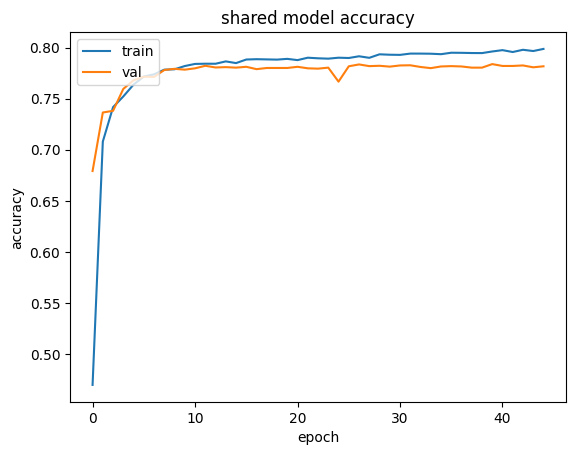

In [33]:
plot_shared(shared_history)

In [34]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'shared_model.h5')
shared.save(trained_model)

c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### Load Saved Model and Evaluate

In [35]:
shared_trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'shared_model.h5')
shared_model = load_model(shared_trained_model)

In [36]:
x_test,y_test = generate_inputs_shared(vec_test,args,indexes)

print("Evaluate on test data")

results = shared_model.evaluate(x_test, y_test, batch_size=batch_size)
y_pred_shared = shared_model.predict(x_test)
print("test loss, test acc:", results)

Evaluate on test data
542/542 [==============================] - 10s 4ms/step
test loss, test acc: [0.5920713543891907, 0.7846829295158386]


In [37]:
m1_y_test = y_test.argmax(axis=1)
m1_y_pred = y_pred_shared.argmax(axis=1)

Classification Report

In [38]:
target_names = [index_ne[i] for i in range(len(index_ne))]

print(classification_report(y_test.argmax(axis=1), y_pred_shared.argmax(axis=1), target_names=target_names))

                                precision    recall  f1-score   support

                    A_ACCEPTED       0.44      0.01      0.01       580
                   A_ACTIVATED       0.74      0.57      0.64       288
                    A_APPROVED       0.62      0.55      0.58       283
                   A_CANCELLED       0.72      0.18      0.29       327
                    A_DECLINED       0.77      0.07      0.13       858
                   A_FINALIZED       0.69      0.83      0.76       561
             A_PARTLYSUBMITTED       1.00      1.00      1.00      1468
                 A_PREACCEPTED       0.53      0.96      0.68       843
                  A_REGISTERED       0.72      0.53      0.61       300
                    O_ACCEPTED       0.65      0.36      0.46       295
                   O_CANCELLED       0.98      0.47      0.64       419
                     O_CREATED       1.00      1.00      1.00       784
                    O_DECLINED       1.00      0.48      0.65  

Confusion Matrix

[[   4    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  576    0    0    0]
 [   0  164   32    0    0    0    0    0   34   24    0    0    0    0
     0    0    0    0    0   17    0   17]
 [   0   19  157    0    0    0    0    0   22   14    0    0    0    0
     0    0    0    0    0   26    0   45]
 [   0    0    0   59    0    5    0    0    0    0    0    0    0   34
     0    0    0    0  134    6   87    2]
 [   1    0    0    0   61    1    0  626    0    0    0    0    0    0
     0    0   11    1  107   13    5   32]
 [   0    0    0    0    0  467    0    0    0    0    0    1    0   92
     0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0 1468    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    8    0    0  811    0    0    0    0    0    0
     0    0   24    0    0    0    0    0]
 [   0   35   52    0    0    0    0    0  158   19    0    0    0    0
     0  

<Axes: >

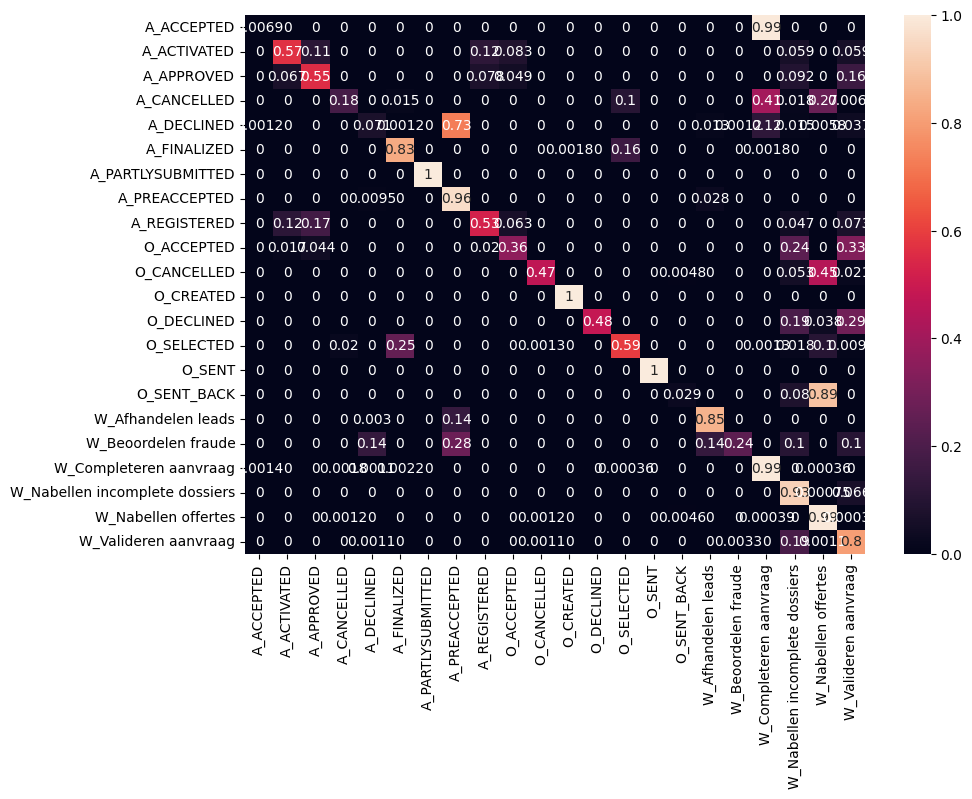

In [39]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_shared.argmax(axis=1))
print(matrix)
matrix_sum = np.sum(matrix, axis=1).reshape(-1,1)
matrix_perc = matrix / matrix_sum
df_cm = pd.DataFrame(matrix_perc, index = [index_ne[i] for i in range(len(index_ne))],
                  columns = [index_ne[i] for i in range(len(index_ne))])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#### specialised Model

In [40]:
specialised = specialised_model(vec_train, weights, indexes, pre_index, args)


In [41]:
specialised.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [42]:
specialised.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ac_input (InputLayer)       [(None, 5, 24)]              0         []                            
                                                                                                  
 rl_input (InputLayer)       [(None, 5, 68)]              0         []                            
                                                                                                  
 t_input (InputLayer)        [(None, 5, 1)]               0         []                            
                                                                                                  
 beta_ac (Bidirectional)     (None, 5, 100)               30000     ['ac_input[0][0]']            
                                                                                            

In [43]:
batch_size = 256 # 32, 64, 128, 256
epochs = 200

In [44]:
specialised_history = specialised_model_fit(vec_train, specialised, indexes, pre_index, MY_WORKSPACE_DIR, batch_size, epochs, args)

This is the output file path  c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\Shared-and-Specialised-Attention-based-Interpretable-Models\BPIC12\models\model_specialised_All_{epoch:02d}-{val_loss:.2f}.h5


Epoch 1/200
135/135 [==============================] - 38s 118ms/step - loss: 2.8234 - accuracy: 0.2801 - val_loss: 2.5188 - val_accuracy: 0.3597 - lr: 0.0010
Epoch 2/200
135/135 [==============================] - 12s 86ms/step - loss: 2.3196 - accuracy: 0.4024 - val_loss: 2.1616 - val_accuracy: 0.4071 - lr: 0.0010
Epoch 3/200
135/135 [==============================] - 12s 91ms/step - loss: 2.0369 - accuracy: 0.4609 - val_loss: 1.9284 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 4/200
135/135 [==============================] - 11s 85ms/step - loss: 1.8428 - accuracy: 0.5082 - val_loss: 1.7616 - val_accuracy: 0.5150 - lr: 0.0010
Epoch 5/200
135/135 [==============================] - 10s 76ms/step - loss: 1.7039 - accuracy: 0.5287 - val_loss: 1.6239 - val_accuracy: 0.5437 - lr: 0.0010
Epoch 6/200
135/135 [==============================] - 11s 83ms/step - loss: 1.5865 - accuracy: 0.5655 - val_loss: 1.5085 - val_accuracy: 0.5911 - lr: 0.0010
Epoch 7/200
135/135 [==============================

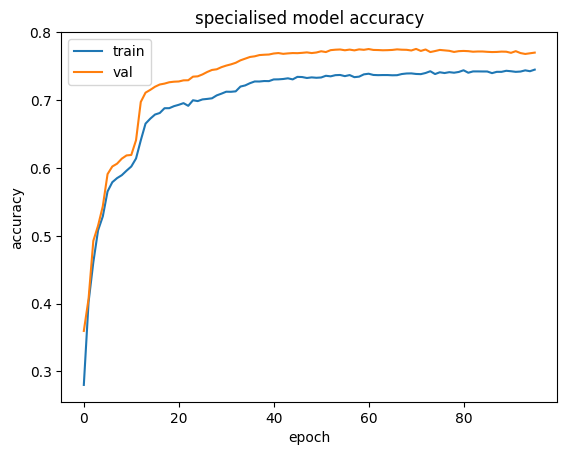

In [45]:
plot_specialised(specialised_history)

In [46]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'specialised_model_'+str(max_size)+'.h5')
specialised.save(trained_model)

c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### Load Saved Model and Evaluate

In [47]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'specialised_model_'+str(max_size)+'.h5')
specialised_model = load_model(trained_model)

Evaluating Prediction Performance

In [48]:
# Generating Inputs

x_test,y_test = generate_inputs(vec_test,args,indexes, experiment)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

results = specialised_model.evaluate(x_test, y_test, batch_size=batch_size)
y_pred = specialised_model.predict(x_test)
print("test loss, test acc:", results)

Evaluate on test data
542/542 [==============================] - 13s 5ms/step
test loss, test acc: [0.6412793397903442, 0.7759038805961609]


In [49]:
m2_y_test = y_test.argmax(axis=1)
m2_y_pred = y_pred.argmax(axis=1)

In [50]:
target_names = [index_ne[i] for i in range(len(index_ne))]

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.22      0.03      0.05       580
           1       0.96      0.43      0.59       288
           2       0.59      0.63      0.61       283
           3       0.72      0.15      0.25       327
           4       0.79      0.07      0.12       858
           5       0.82      0.67      0.74       561
           6       1.00      1.00      1.00      1468
           7       0.53      0.97      0.69       843
           8       0.71      0.57      0.63       300
           9       0.66      0.34      0.45       295
          10       0.99      0.44      0.61       419
          11       0.99      1.00      0.99       784
          12       1.00      0.45      0.62       104
          13       0.71      0.74      0.73       760
          14       1.00      0.99      1.00       765
          15       0.17      0.00      0.01       376
          16       0.94      0.84      0.89       664
          17       0.65    

Confusion Matrix

[[  16    0    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0    0  563    0    0    0]
 [   0  124   51    0    0    0    0    0   52   27    0    0    0    0
     0    0    0    0    0   19    0   15]
 [   0    0  177    0    0    0    0    0   13    2    0    0    0    0
     0    0    0    0    0   33    0   58]
 [   0    0    0   49    0    0    0    0    0    0    0    0    0   42
     0    0    0    0  139    7   88    2]
 [   3    0    0    1   57    1    0  627    0    0    0    0    0    0
     0    0   14    1  104   18    5   27]
 [   0    0    0    0    0  375    0    0    0    0    0    0    0  179
     0    0    0    0    7    0    0    0]
 [   0    0    0    0    0    0 1468    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  821    0    0    0    0    0    0
     0    0   19    1    2    0    0    0]
 [   0    5   62    0    0    0    0    0  171   22    0    0    0    1
     0  

<Axes: >

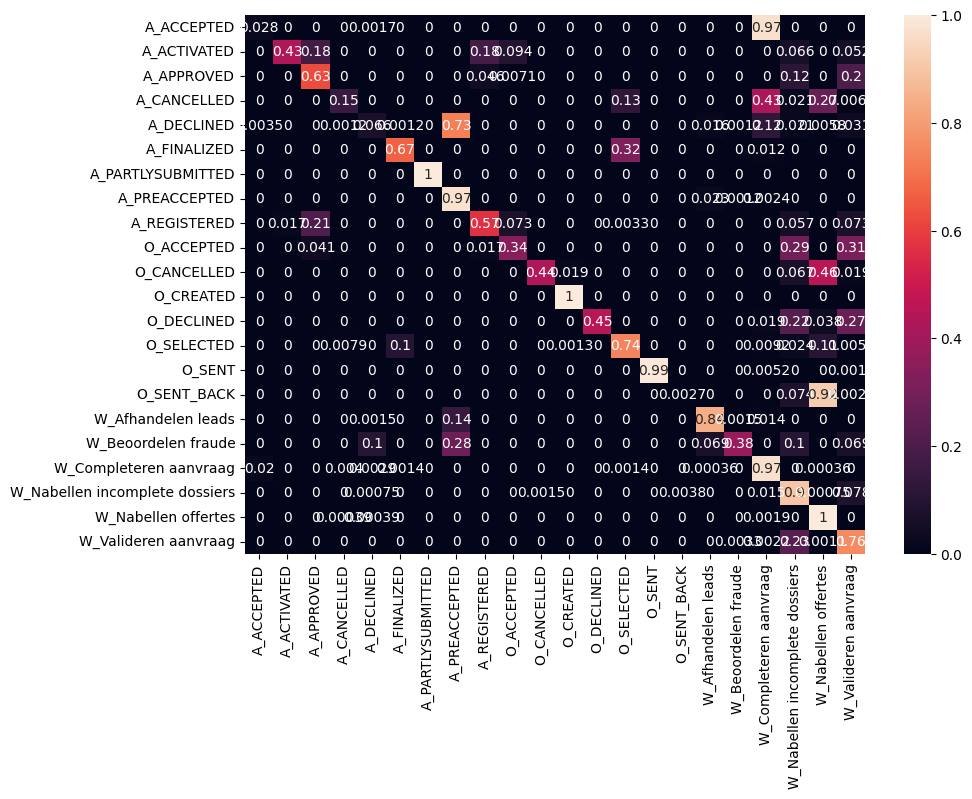

In [51]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)
matrix_sum = np.sum(matrix, axis=1).reshape(-1,1)
matrix_perc = matrix / matrix_sum
df_cm = pd.DataFrame(matrix_perc, index = [index_ne[i] for i in range(len(index_ne))],
                  columns = [index_ne[i] for i in range(len(index_ne))])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [52]:
m1_y_pred
m2_y_test = y_test.argmax(axis=1)
m2_y_pred = y_pred.argmax(axis=1)

In [53]:
import scipy.stats as stats
stats.ttest_ind(st['m1_y_pred'], st['m2_y_pred'])

NameError: name 'st' is not defined

In [ ]:
st.to_csv("st.csv")